<a href="https://colab.research.google.com/github/Portia-dot/API-/blob/main/Convolutional_Neural_Networks_%26_Computer_Vision_With_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download our dataset

In [2]:
#Get the data
import zipfile 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the download 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-04-09 22:29:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  41.0MB/s    in 2.5s    

2022-04-09 22:29:53 (41.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Access the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

#Walk through the pizza steak directory ad list number of files 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .


In [7]:
#Another way to find out how many images are in a file 
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

Visualize out images

In [8]:
#Get the class names programatically 
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
#Let Visualize out images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  #Set up the target directory 
  target_folder = target_dir+target_class
  #Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #Read the image and plot it 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Images shape: {img.shape}")

  return img

['2572958.jpg']
Images shape: (512, 512, 3)


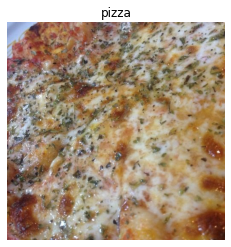

In [10]:
img = view_random_images(target_dir="pizza_steak/train/", target_class="pizza")

In [11]:
import tensorflow as tf 
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[159, 181, 228],
        [160, 182, 229],
        [160, 182, 229],
        ...,
        [170, 153, 137],
        [220, 201, 184],
        [229, 211, 191]],

       [[164, 185, 232],
        [163, 185, 232],
        [163, 185, 232],
        ...,
        [197, 180, 164],
        [222, 204, 184],
        [209, 191, 169]],

       [[165, 186, 233],
        [164, 186, 233],
        [164, 186, 233],
        ...,
        [195, 178, 160],
        [186, 169, 149],
        [162, 146, 123]],

       ...,

       [[131,  62,  65],
        [128,  59,  62],
        [126,  55,  59],
        ...,
        [ 62,  24,  13],
        [ 65,  27,  16],
        [ 68,  30,  19]],

       [[136,  69,  76],
        [127,  60,  67],
        [119,  53,  57],
        ...,
        [ 63,  25,  14],
        [ 65,  27,  16],
        [ 67,  29,  18]],

       [[134,  69,  77],
        [137,  72,  80],
        [137,  72,  78],
        ...,
        [ 63,  25,  1

In [12]:
img.shape # Return width, height, color channels

(512, 512, 3)

Preprocess out data

In [13]:
#Get all the pixel value between zero and one 
img/255 



array([[[0.62352941, 0.70980392, 0.89411765],
        [0.62745098, 0.71372549, 0.89803922],
        [0.62745098, 0.71372549, 0.89803922],
        ...,
        [0.66666667, 0.6       , 0.5372549 ],
        [0.8627451 , 0.78823529, 0.72156863],
        [0.89803922, 0.82745098, 0.74901961]],

       [[0.64313725, 0.7254902 , 0.90980392],
        [0.63921569, 0.7254902 , 0.90980392],
        [0.63921569, 0.7254902 , 0.90980392],
        ...,
        [0.77254902, 0.70588235, 0.64313725],
        [0.87058824, 0.8       , 0.72156863],
        [0.81960784, 0.74901961, 0.6627451 ]],

       [[0.64705882, 0.72941176, 0.91372549],
        [0.64313725, 0.72941176, 0.91372549],
        [0.64313725, 0.72941176, 0.91372549],
        ...,
        [0.76470588, 0.69803922, 0.62745098],
        [0.72941176, 0.6627451 , 0.58431373],
        [0.63529412, 0.57254902, 0.48235294]],

       ...,

       [[0.51372549, 0.24313725, 0.25490196],
        [0.50196078, 0.23137255, 0.24313725],
        [0.49411765, 0

In [14]:
#An end to end example 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed 
tf.random.set_seed(42)

#Preprocess data(get all of the pixel values between 0 & 1, also called scaling and normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


#Setup  paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                batch_size=32,
                                target_size =(224, 224),
                                class_mode="binary",
                                seed = 42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size =(224, 224),
                                               class_mode="binary",
                                               seed=42)


#Build a CNN model (same as the tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size = 3,
                                                             activation = "relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2, 
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model

model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#Fit the model 
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 265ms/step - loss: 0.5353 - accuracy: 0.7187 - val_loss: 0.3717 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4177 - accuracy: 0.8273 - val_loss: 0.3730 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3857 - accuracy: 0.8293 - val_loss: 0.3208 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3650 - accuracy: 0.8393 - val_loss: 0.4128 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3370 - accuracy: 0.8673 - val_loss: 0.3002 - val_accuracy: 0.8680


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

USING OLD BULIT MODEL TO SEE IF IT WORKS WITH OUR IMAGE DATA

In [16]:
from threading import active_count
#Set random seed
tf.random.set_seed = 42

#Create the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
#Compile the model 
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model 
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 223ms/step - loss: 0.6761 - accuracy: 0.5887 - val_loss: 0.6290 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6153 - accuracy: 0.7340 - val_loss: 0.5945 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6008 - accuracy: 0.7453 - val_loss: 0.5816 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5840 - accuracy: 0.7627 - val_loss: 0.5748 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.5698 - accuracy: 0.7673 - val_loss: 0.5571 - val_accuracy: 0.7900


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Let try and improve model 2

In [18]:
#set the random seed 
tf.random.set_seed = 43

#Create the model
model_3 = tf.keras.Sequential([
                      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                      tf.keras.layers.Dense(100, activation="relu"),
                      tf.keras.layers.Dense(100, activation="relu"),
                      tf.keras.layers.Dense(100, activation="relu"),
                      tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile Model 
model_3.compile (
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Fit the model 
history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 16s 339ms/step - loss: 3.2830 - accuracy: 0.6273 - val_loss: 0.7352 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.9292 - accuracy: 0.6813 - val_loss: 0.9594 - val_accuracy: 0.6400
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6143 - accuracy: 0.7293 - val_loss: 0.4699 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.5101 - accuracy: 0.7860 - val_loss: 0.4487 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5268 - accuracy: 0.7647 - val_loss: 0.4695 - val_accuracy: 0.7820


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['2779040.jpg']
Images shape: (384, 512, 3)
['1035854.jpg']
Images shape: (512, 512, 3)


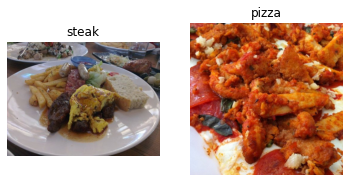

In [20]:
#Visualize the data 
plt.figure()
plt.subplot(1,2,1)
stack_img = view_random_images("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_images("pizza_steak/train/", "pizza")

In [21]:
#Preprocess the data 
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Turn our data into **batches**

In [22]:
!nvidia-smi


Sat Apr  9 22:33:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |   1305MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
#Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
#Load in our image data from dir and turn them into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory= test_dir,
                                             target_size =(224, 224,),
                                             class_mode ="binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
#Get a sample of a training data batch 
images, labels = train_data.next() #Get the next batc h images /labels in the data

len(images), len(labels)

(32, 32)

In [26]:
#How many batches are there 

len(train_data)

47

In [27]:
#Get the first two images 
images[:2], images[0].shape 

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Create a CNN model start with a baseline(the baseline is a simpple modle or existing result that you setup when starting a machine learning experiments ans you can try and improve it after

In [30]:
#Making the creating easier of our model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In deep learning theres infiniate amount of architecture you could create, the best is to create a simple model and then see which works better before introducing  complexity

In [45]:
#Create the model 
model_4 = Sequential([
                      Conv2D(filters = 10,
                             kernel_size = 3,
                             strides = 1,
                             padding="valid",
                             activation = "relu",
                             input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation = "relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])
#Compile the model 
model_4.compile(
    loss = "binary_crossentropy",
    optimizer =Adam(),
    metrics=["accuracy"]
)

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Chech the len of the training and testing data 

len(train_data), len(test_data)

(47, 16)

In [46]:
#Fit model 
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data = test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 260ms/step - loss: 0.6851 - accuracy: 0.6713 - val_loss: 0.3997 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4132 - accuracy: 0.8220 - val_loss: 0.3839 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3340 - accuracy: 0.8707 - val_loss: 0.3577 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 12s 252ms/step - loss: 0.2243 - accuracy: 0.9233 - val_loss: 0.3330 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 12s 251ms/step - loss: 0.1281 - accuracy: 0.9607 - val_loss: 0.3326 - val_accuracy: 0.8520


In [40]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [41]:
#Check model_1

model_1.evaluate(test_data)

16/16 [==============================] - 3s 166ms/step - loss: 0.3002 - accuracy: 0.8680


[0.3002071976661682, 0.8679999709129333]

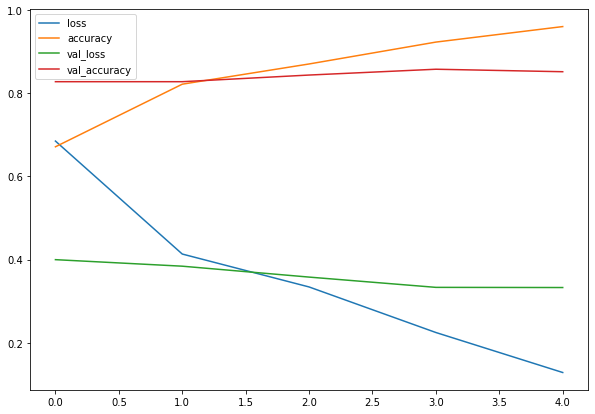

In [47]:
#Evaluating our baseline model


#Ploting the training  curve 

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
#Plot the validation and training curve seprately
def plot_loss_curves (history):
  """
  Return seprate loss curves  for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss 
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot the accuracy
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label= "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()